# CVPR Project - Part II: Multi Templates Matching with SIFT

## Multi Model Multi Template Fitting

Iva Ilcheva<br>
Reinard Lazuardi Kuwandy

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from scipy import spatial
%matplotlib inline

IMG_TARGET = 'img/target-chocolates.jpg'
IMG_TEMPLATE = [
    'img/au-lait.jpg',
    'img/choco-noisettes.jpg', 
    'img/cremant.jpg',
    'img/gianduja.png',
    'img/noir-amarante.jpg',
    'img/noir-coco.jpg',
    'img/noir-gingembre.jpg', 
    'img/noir-orange.jpg'
]

### Helper Functions

In [2]:
from utils import *

## Implementation

## CHOCO NOISETTES ##

In [65]:
img_target, img_template2 = read_images(IMG_TARGET, IMG_TEMPLATE[1])

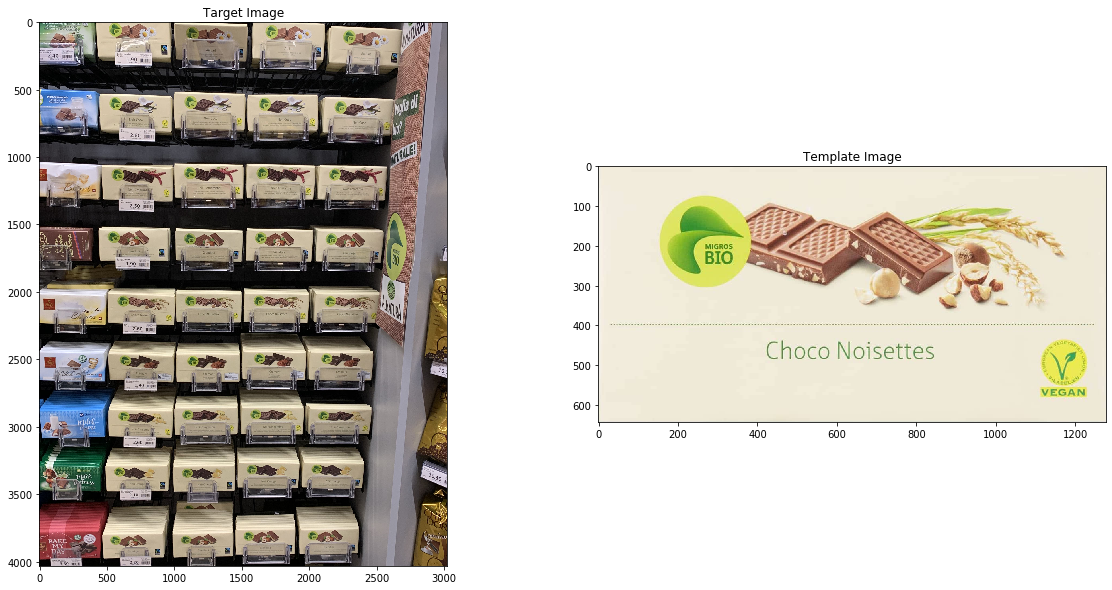

In [66]:
plot_images(img_target, img_template2)

In [67]:
keypoints_target, descriptors_target, keypoints_template2, descriptors_template2 = sift_keypoints_and_descriptors(img_target, img_template2)

In [68]:
plot_best_matches2, best_matches2 = get_best_matches(descriptors_target, descriptors_template2, ratio=0.45)

In [69]:
correspondences2 = get_correspondences(best_matches2, keypoints_target, keypoints_template2)

In [70]:
len(correspondences2)

353

In [86]:
models2 = sequential_msac(correspondences2, 1, 4,99,2500, 0.8)

319
292
277
256
241
227
212
196
185
174
163
154
146


In [89]:
PS2 = get_preference_sets(correspondences2, models2)

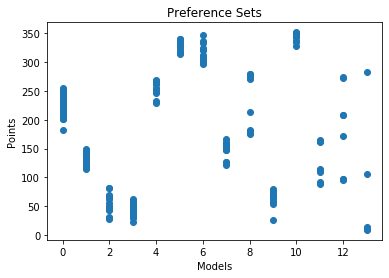

In [90]:
plot_scatter(PS2)

In [91]:
cl2 = j_linkage(PS2)

In [92]:
mod2 = remove_pref_set(cl2)

In [94]:
mod2 = get_model(cl2,correspondences2)

In [95]:
new_mod2 = delete_small_model(mod2, 4)

In [98]:
clusters_2, clusters_size_list2 = define_clusters(new_mod2)
clusters_size2 = len(clusters_2)
print("Previous dunn index of the cluster : {}".format(dunn_index(clusters_size_list2, clusters_2)))

new_test_model2 = remove_far_distances_clusters(clusters_2, new_mod2,100)

print("Num of clusters previously: {}".format(len(new_mod2)))

clusters_new2, clusters_size_list_new2 = define_clusters(new_test_model2)
clusters_new2, new_test_model2 = merge_cluster(clusters_new2, new_test_model2)
clusters_new2, clusters_size_list_new2 = define_clusters(new_test_model2)

print("Num of clusters currently: {}".format(len(new_test_model2)))
print("Current dunn index of the cluster : {}".format(dunn_index(clusters_size_list_new2, clusters_new2)))

Previous dunn index of the cluster : 0.0014490544946033222
Num of clusters previously: 15
Num of clusters currently: 4
Current dunn index of the cluster : 0.07135066195720353


In [99]:
img_target, img_template2 = read_images(IMG_TARGET, IMG_TEMPLATE[1])

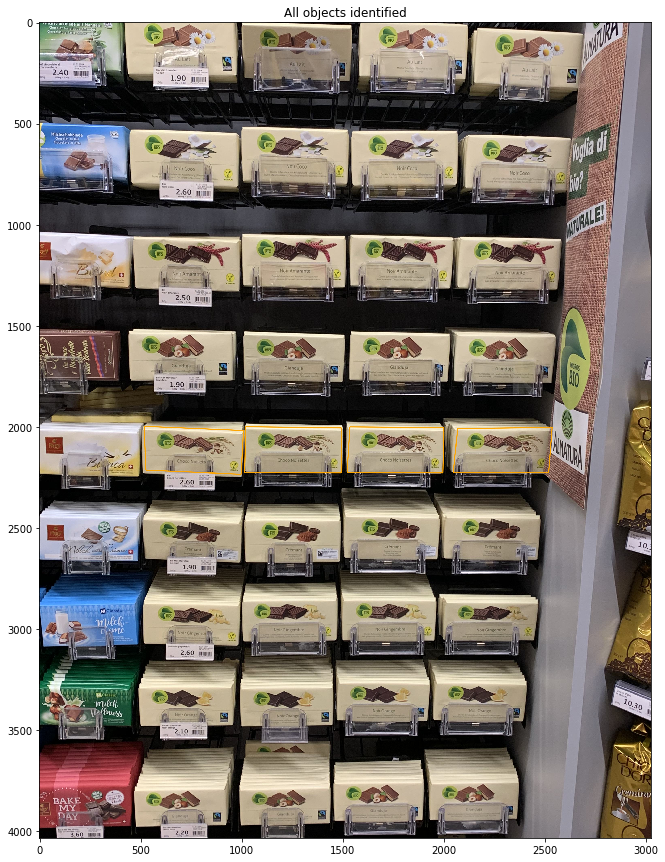

In [100]:
draw_bounding_boxes(img_target, img_template2, new_test_model2, 1, True, color=(3, 165, 252))